<a href="https://colab.research.google.com/github/AarohSinha100/DEEP_LEARNING/blob/main/02_neural_network_classification_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Network Clssification with TensorFlow

In this notebook we are going to learn how to write neural networks for classification with Tensorflow.

Classification is type of problem, where you try to classify something as one thing or another.

A few types of classification
* Binary Calssification
* Multiclass classification
* Multilabel classification

# Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42) # Random state is so that every time we get ssame data (Reproducability)

In [ ]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is little hard to understand lets visualize it.

In [ ]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y}) #ZEROTH AXIS FROM X , FIRST AXIS OF X, THE THE LABELS (1 AND 0) 
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


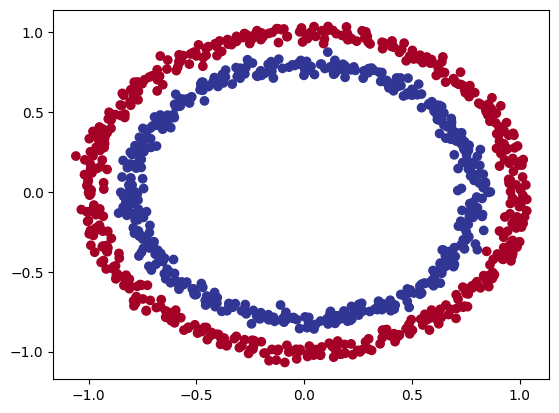

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu);
#Our data makes a large circle with a smaler circle in 2d.

In this model we are going to build a model to classify between red and blue dots of circles. We basically want our model to build kind of a line between the red and blue circle. 0 and 1 means red and blue in our circles["labels"]

## Input and output Shapes

In [ ]:
# Check the shapes of our features and labels.

X.shape, y.shape
#Y has only one value so desent has a second dimension

((1000, 2), (1000,))

In [ ]:
# How many samples are we working with
len(X) , len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [ ]:
import tensorflow as tf

In [ ]:
# Set the random seed
tf.random.set_seed(42)

#1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile (Note this is Binnary classification as there is 1 and 0)
model_1.compile(loss = tf.keras.losses.binary_crossentropy, #BinaryCrossentropy because this is a binary classification problem.
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model
model_1.fit(X,y,epochs=5) #As first model, later we will do more experimentation

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.4624 - accuracy: 0.4830
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 4.8413 - accuracy: 0.4900
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 3.6884 - accuracy: 0.5180
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.8155 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7218 - accuracy: 0.5010


In [ ]:
#accuracy: 0.5000 means in prediction, our model is only 50% right. (Its basically just guessing :( ))

In [ ]:
# Lets try and improve our model by training for longer
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)
# Only 50% accuracy for 200 epochs?? lets now add a new layer

32/32 [==============================] - 1s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [ ]:
#Set the random seed
tf.random.set_seed(42)

#1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss=tf.keras.losses.binary_crossentropy, #BinaryCrossentropy because this is a binary classification problem.
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3.Fit the model
model_2.fit(X,y,epochs=100,verbose=0)

In [ ]:
#4. Evaluate the model
model_2.evaluate(X,y) #Note that we are evaluating on the same data. It is not a good practice always use training and testing :)

In [ ]:
#WHy are we getting same 50 accuracy
# Lets look at the number of red and blue circles
circles["label"].value_counts()

# Improving our model

Lets look into our bag of tricks on how we can improve our model.

1. **Create a model** - Add more layers or increase the number of hidden units within the layers
2. **Compile a model** - We might want to choose a diffrent optimization function such as Adam instead of SGD
3. **Fitting the model** - Perhaps we might fit our model for more epochs (leave it training for longer)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

#1. Create a model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), #Add 100 dense neuraons
    tf.keras.layers.Dense(10), #Add another layers with 10 neurons
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. Fit the model
model_3.fit(X,y,epochs=100,verbose=0)


In [ ]:
#4. Evaluate the model
model_3.evaluate(X,y) #We are still getting 50 accuracy??????...bro why :(

# Creating a function to visualize our models prediction to plot predictions on the data scatterplot (to check the decission boundary)

* Take in a trained model
* Create a meshgrid of diffrent X values
* Make predictions across a meshgrid
* Plot the predictions as well as lines between zones (where each unique class falls)

In [ ]:
import numpy as np
def plot_decission_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgird
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() +0.1 # 0.1 to get bit of a margin
  y_min, y_max =  X[:,1].min() - 0.1, X[:,1].max() +0.1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                       np.linspace(y_min,y_max,100)) #Linspace returns evenly spaced numbers over a specified interval. (with size=100)
  #Create a X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] #._c translates slice objects to concatenate along the second axis (Stack 2d arrays together)

  #Make Predictions
  y_pred = model.predict(x_in)

  #Check for the multiclass class
  if len(y_pred[0]) >1:
    print("doing multiclass classification")
    #We have to reshape our predictions to make them ready
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #Plot the decission boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())


313/313 [==============================] - 1s 3ms/step
doing binary classification


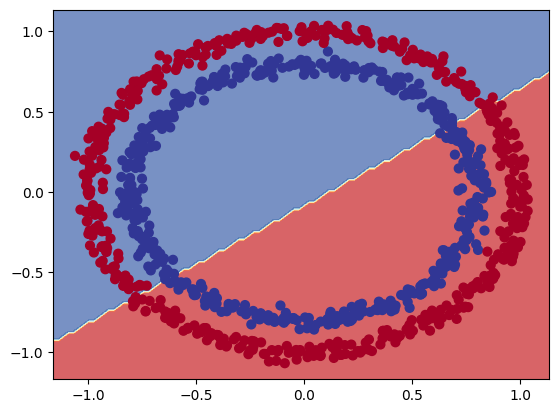

In [ ]:
plot_decission_boundary(model=model_3,
                        X=X,
                        y=tf.expand_dims(y,axis=1))
#The line down there is our predictions.....we wanted a circle.

In [ ]:
# Lets see if our model can be used for reression problem

tf.random.set_seed(42)

#Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # Y = x+100

#Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

Epoch 1/100


ValueError: ignored

Oh... wait we compiled our model for a binary classification problem

But... we re now now working on regression problem, lets change this model to suit our data

In [ ]:
# Setup the random seed
tf.random.set_seed(42)

#1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#Compile this time with a regression specfic loss function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#Fit the model
model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)

In [ ]:

# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

#Plot the models predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b",label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g",label="Test Data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="Predictions")
plt.legend();

## The missing peice: Non Linearity (One of the most important concepts in neural networks)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

#2. Comile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

#3.Fit the model
history = model_4.fit(X,y,epochs=100)

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

In [ ]:
# Check the decission boundary for the latest model
plot_decission_boundary(model=model_4,
                         X=X,
                         y=y)

Lets try build our first neural network with a non linear activation function

In [ ]:
tf.random.set_seed(42)

#Non linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(X,y,epochs=100)

In [ ]:
# Time to replicate multilayer neural network from tensorflow playground
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_6.fit(X,y,epochs=200)

In [ ]:
plot_decission_boundary(model_6,X,y)

In [ ]:
# Okayy again improving our model

tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid") #OUTPUT ACTIVATION IS USUALLY SIGMOID AND HIDDEN(ABOVE 2 ARE HIDDEN) ARE RELU
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_7.fit(X,y, epochs=100)

In [ ]:
# We are getting like 98 accuracy

#Lets evaluate
model_7.evaluate(X,y)

In [ ]:
# Visualize
plot_decission_boundary(model_7,X,y)
#Mannnnnnn We Are Getting A Good Decisiion Boundary....except a few points

Means Sigmoid is ideal for the output layer in classification and non linear stuff.


***But the model trains and tests on the same data***

***----The combination of non-linear(straingt lines) and non=linear lines functions is one of the key fundamental of neural networks----***

Now we have discussed the concept of linear and non linearfunction now lets see them in action

In [ ]:
# Create a toy tensor (similiar to data we pass in our model)
A = tf.cast(tf.range(-10,10),tf.float32)
A

In [ ]:
# Visualize our toy tensor
plt.plot(A)

## Visualizing the SIGMOID FUNCTION

In [ ]:
# Replicate the formula of sigmoid function... sigmoid(x) = 1/(1+exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

#Use the sigmoid function on toy tensor A
sigmoid(A)


In [ ]:
#Lets plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

## VISUALISING THE RELU

* ###### relu gives max(x,0) means (0 for x>0 and x for x<=0)

In [ ]:
def relu(x):
  return tf.maximum(0,x)

#Lets pass our toy tensor to our custom relu function
A, relu(A) #Look relu makes all negetive to 0

In [ ]:
# Lets plot our toy tensor on relu 
plt.plot(relu(A))

# Visualising the Linear Activation function

* #####Returns the input unmodified :)

In [ ]:
#Lets try the linear
tf.keras.activations.linear(A) #Just returns the tensor

In [ ]:
plt.plot(tf.keras.activations.linear(A))

In [ ]:
#Does A even change
A == tf.keras.activations.linear(A) #All of the elements remain the same.

## Evaluating and improving our classifications

* We must train our models on training and testing datasets

In [ ]:
# Check the examples number
len(X) #And this data is in random order

In [ ]:

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:] , y[800:]

X_train.shape, X_test.shape,y_train.shape, y_test.shape


In [ ]:
#Lets recreate a model to fit on training data and evaluate on testing data
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"]
)

history = model_8.fit(X_train,y_train,epochs=25)

In [ ]:
#Evaluate the model on the test datasets
model_8.evaluate(X_test,y_test)

## Plot the loss (or training) curves


In [ ]:
# Convert the history object into DataFrame
pd.DataFrame(history) #History keeps record of models analytics basically

In [ ]:
pd.DataFrame(history).plot()
plt.title("MODEL 8 LOSS CURVE")

In [ ]:
## Using callbacks to eva